# Predicting age in crabs using machine learning

- Author: Alejandro Santos
- Tools: Python, Pandas, NumPy, Jupyter Notebook, Scikit-learn, Matplotlib
- Dataset: Crag Age Prediction (Kaggle): https://www.kaggle.com/datasets/sidhus/crab-age-prediction

## 1.	Context and motivation

This project originated as a self-directed learning exercise in supervised machine learning, applying basic data analysis and predictive modeling techniques to a real-world dataset. Although the problem domain falls within the biological field (marine life), the approach is purely statistical and computational, requiring no in-depth knowledge of biology or chemistry.

The main objective is to predict the age of crabs from physical measurements, initially using a linear regression model, with the aim of evaluating its performance and understanding its limitations.

## 2. Understanding the dataset

In [161]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [163]:
 df = pd.read_csv('CrabAgePrediction.csv')

In [165]:
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


The dataset contains morphological measurements of crabs and two variables of interest:
- **Predictor variables (features):**
  - Lenght
  - Diameter
  - Height
  - Weight
  - Shucked Weight
  - Shell Weight
- **Potential target variables (target)**
  - Sex (categorical)
  - Age (numerica)

**target decision**

For this project, Age is selected as the target variable because:
- It is a continuous numerical variable, suitable for regression models.
- Conceptually, it can be inferred from the organism's physical characteristics.

## 3. Exploratory Data Analysis (EDA)

### 3.1. Null values and consistency

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


At first glance, the dataset does nor appear to have any explicit null values (NaN). However, when analyzing descriptive statistics, a minimun value of 0.000 is detected for the Height variable, which is not physically plausible.

In [175]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [177]:
df.sort_values("Height", ascending=True)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
3867,I,1.0750,0.8500,0.0000,12.133586,5.854172,2.438057,3.260193,8
269,I,0.7875,0.5750,0.0000,3.798833,1.630096,0.807961,9.936500,6
1330,I,0.1875,0.1375,0.0250,0.056699,0.028349,0.014175,0.042524,1
1123,I,0.4125,0.2875,0.0375,0.411068,0.155922,0.085048,0.141747,4
3542,F,1.5875,1.2375,0.0375,32.786197,14.500769,8.731646,8.178831,9
...,...,...,...,...,...,...,...,...,...
2588,F,1.4875,1.1750,0.6250,36.372408,13.097469,7.016501,12.615528,14
772,M,1.9375,1.5750,0.6250,78.797435,38.229301,21.545620,16.386011,12
1485,F,2.0375,1.6250,0.6250,63.928123,25.245230,11.906790,22.608726,14
748,M,1.7625,1.4125,1.2875,62.652395,31.397071,13.792032,14.514944,10


### 3.2. Treatment of invalid values.

- Only two records with Height = 0 are indetified.
- It is decided to remove them to avoid introducing noise into the model, and they are stored as new dataframe called "df_good".

In [181]:
df_good = df[df["Height"] > 0.0000]

## 4. Preparing data for Machine Learning.

### 4.1. Coding of categorical variables.

The Sex column contains three categories:
- Male
- Female
- Infant

Since scikit-learn only works with numeric values, one hot encoding is applied, transforming this column into three binary variables.

In [186]:
df_good = pd.get_dummies(df_good, columns=["Sex"])

In [151]:
df_good

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,True,False,False
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,False,False,True
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,False,True,False
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,True,False,False
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,True,False,False
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,True,False,False
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,False,True,False
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,False,True,False


## 5. Dataset division and modeling Linear Regression.

The data are separated into:
- X: predictor variables
- y: target variable (Age)

Subsequently, two validation strategies are employed:

In [190]:
print(type(df_good))

<class 'pandas.core.frame.DataFrame'>


In [192]:
X = df_good.drop("Age", axis=1).values
y = df_good["Age"].values

print(X.shape, y.shape)
print(type(X), type(y))

(3891, 10) (3891,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### 5.1. Train_test_split

- Splits the dataset only once
- Quick and easy
- Tends to be **optimistic** in its evaluation

In [50]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg.fit(X_train, y_train)
predictions_split = reg.predict(X_test)

print("Predictions: {}, Actual values: {}".format(predictions_split[:5], y_test[:5]))

Predictions: [11.39024541 10.87409832  9.89979632 12.57729655 10.76836474], Actual values: [11 11  9 16 11]


### 5.2. Cross-validation (K-fold + cross_val_predict)

In [215]:
from sklearn.model_selection import cross_val_predict, KFold

In [217]:
reg = LinearRegression()
kf = KFold(n_splits=6, shuffle=True, random_state=42)

In [219]:
cv_results = cross_val_predict(reg, X, y, cv=kf)
print("Predictions: {}, Actual values: {}". format(cv_results[:5], y_test[:5]))

Predictions: [ 9.87949838  7.52045824  7.91559376 10.48102599  6.4743011 ], Actual values: [11 11  9 16 11]


## 6. Results and comparison

### 6.1. Visual observation.

When comparing actual vs. predicted values
- Train_test_split shows a seemingly better fit
- Cross_val_predict shows greater dispersion

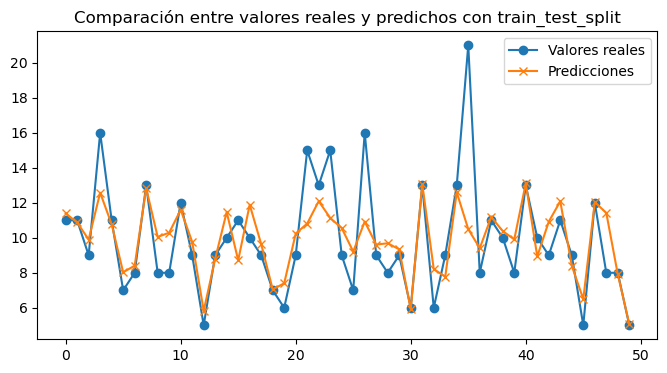

In [54]:
plt.figure(figsize=(8,4))
plt.plot(y_test[:50], label='Valores reales', marker='o')
plt.plot(predictions_split[:50], label='Predicciones', marker='x')
plt.legend()
plt.title("Comparación entre valores reales y predichos con train_test_split")
plt.show()

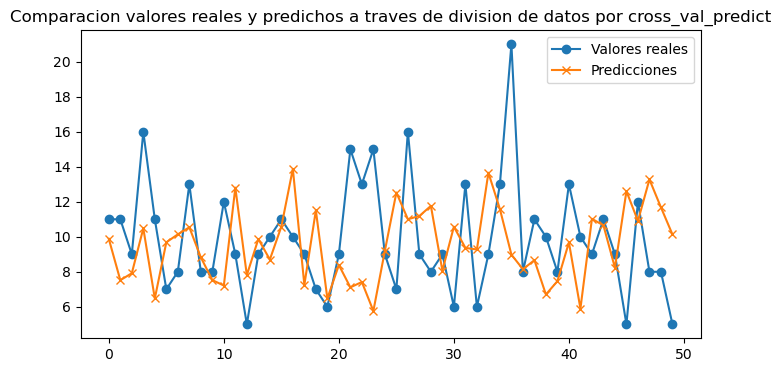

In [46]:
plt.figure(figsize=(8,4))
plt.plot(y_test[:50], label="Valores reales", marker= "o")
plt.plot(cv_results[:50], label="Predicciones", marker= "x")
plt.legend()
plt.title("Comparacion valores reales y predichos a traves de division de datos por cross_val_predict")
plt.show()

## 7. Quantitative evaluation of the model

The coefficient of determination (R^2) is used

In [56]:
from sklearn.model_selection import cross_val_score, KFold

In [58]:
reg = LinearRegression()
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_results_results = cross_val_score(reg, X, y, cv=kf)
print("El coeficiente de determinacion r^2 es de {}". format(cv_results_results))

El coeficiente de determinacion r^2 es de [0.54113689 0.54650093 0.54761375 0.50223821 0.53715187 0.41351619]


This indicates that the model explains approximately 50% of the actual variability in age.
- **Interpretacion**
    - The model learns, but is limited.
    - There is significant room for improvement.
<br>
For a first linear model, this result is entirely acceptable.

## 8. Limitations and possible improvements

- Use of nonlinear models
- Polynomial regression
- Separate models by sex
- Incorporate additional metrics:
    - MAE (Mean Absolute Error)
    - RMSE (Root Mean Squared Error)
   

## 9. Conclusion

This first part of the work represents a practical introduction to supervised machine learning. Based on the analysis performed, it is concluded that linear regression constitutes a suitable base model, primarily useful for verifying the consistency of the dataset and establishing an initial benchmark, although it is limited for capturing more complex relationships between variables. Furthermore, the importance of using multiple evaluation metrics to analyze the model's performance beyond a single measure is evident, allowing for a more complete interpretation of the results obtained. In this stage of the project, fundamental processes such as data cleaning, review of missing values, dataset splitting, model training, and evaluation of the results using metrics and visualizations were addressed. This constitutes a complete first cycle of development for a Machine Learning project. Version 2 of the work will incorporate more complex models and additional evaluation metrics, with the aim of improving predictive capacity and deepening the analysis of the problem. Thus, the crab age prediction project using Machine Learning is presented as an evolving work, with solid initial results and high potential for improvement in future iterations.